<a href="https://colab.research.google.com/github/Suryaprasadindra/Meals_forecasting_project/blob/main/Copy_of_MealsDelivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary modules**

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Exploring Data sets**

In [175]:
meal_info = pd.read_csv("/content/meal_info.csv")
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [176]:
fulfilment_center_info = pd.read_csv("/content/fulfilment_center_info.csv")
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [177]:
train = pd.read_csv("/content/train[1].csv")
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [178]:
train.shape

(456548, 9)

In [179]:
# Merging train data with meal info data on 'meal_id'
merged_data = pd.merge(train, meal_info, on='meal_id', how='left')

# Merging the result with fulfillment center data on 'center_id'
merged_data = pd.merge(merged_data, fulfilment_center_info, on='center_id', how='left')

# Display the first few rows of the merged dataset
merged_data_head = merged_data.head()
merged_data_head

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [180]:
merged_data.shape

(456548, 15)

In [181]:
# Check for duplicate rows in the merged_data DataFrame
duplicate_rows = merged_data[merged_data.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 0


In [182]:
# Check for missing values in the merged_data DataFrame
missing_values = merged_data.isnull().sum()

# Print the number of missing values for each column
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64


In [183]:
merged_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [184]:
merged_data.info() #checking data/variable type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [185]:
# Dropping  the unnecessary colums from merged data
merged_data = merged_data.drop(['id', 'city_code', 'region_code','op_area'], axis=1)

# Display the first few rows of the updated dataset
merged_data.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,TYPE_C
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,TYPE_C
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,TYPE_C
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,TYPE_C
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,TYPE_C


In [186]:
merged_data.shape

(456548, 11)

# **EXPLORING DATA ANALYSIS**

In [187]:
merged_data.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [188]:


merged_data.emailer_for_promotion.value_counts() # 0 indicates - not emailed to customers, 1 indicates emailed to customers for promotions

,count
emailer_for_promotion,
0,419498
1,37050


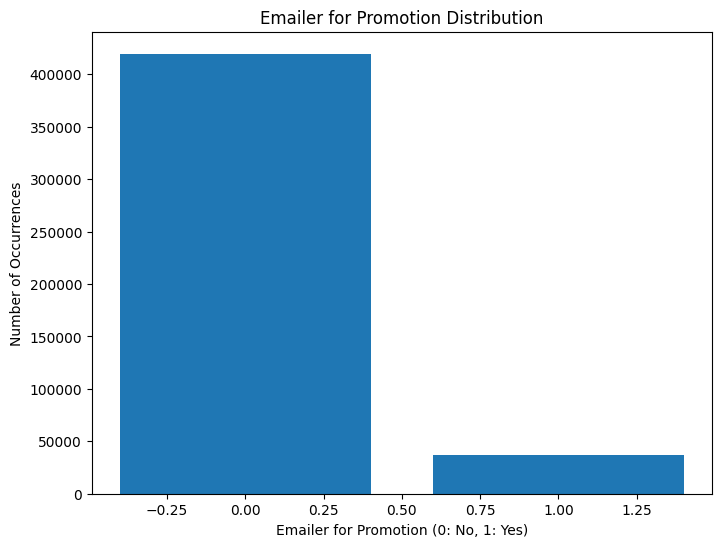

In [189]:

emailer_counts = merged_data['emailer_for_promotion'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(emailer_counts.index, emailer_counts.values)
plt.xlabel('Emailer for Promotion (0: No, 1: Yes)')
plt.ylabel('Number of Occurrences')
plt.title('Emailer for Promotion Distribution')
plt.show()

In [190]:
# Calculating the number of orders from email promotion in 145 weeks
orders_per_email_promotion = merged_data.groupby('emailer_for_promotion')['num_orders'].sum()

orders_per_email_promotion

,num_orders
emailer_for_promotion,
0,96175321
1,23382164


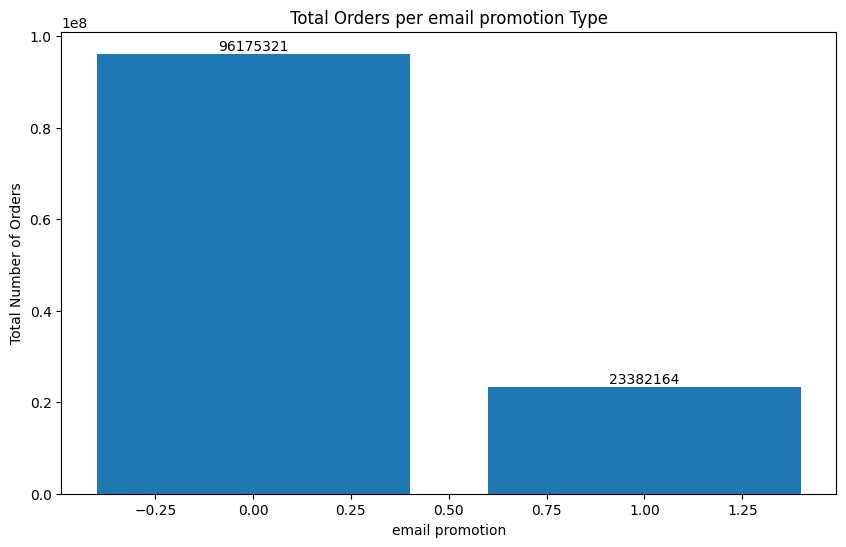

In [191]:
# a bar chart for the 'orders_per_email_promotion' data
plt.figure(figsize=(10, 6))
plt.bar(orders_per_email_promotion.index, orders_per_email_promotion.values)
plt.xlabel('email promotion')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per email promotion Type')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_email_promotion.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [192]:
merged_data.homepage_featured.value_counts() # 0 indicates - not featured the product in home page of website, 1 indicates featured on homepage

,count
homepage_featured,
0,406693
1,49855


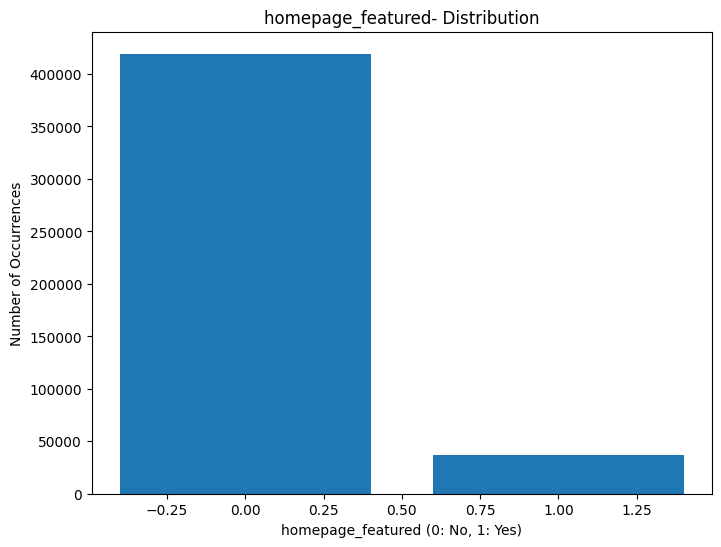

In [193]:
homepage_featured = merged_data['homepage_featured'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(emailer_counts.index, emailer_counts.values)
plt.xlabel('homepage_featured (0: No, 1: Yes)')
plt.ylabel('Number of Occurrences')
plt.title('homepage_featured- Distribution')
plt.show()

In [194]:
# Calculating the number of orders from home page featured  in 145 weeks
orders_per_homepage_featured = merged_data.groupby('homepage_featured')['num_orders'].sum()

orders_per_homepage_featured

,num_orders
homepage_featured,
0,89899504
1,29657981


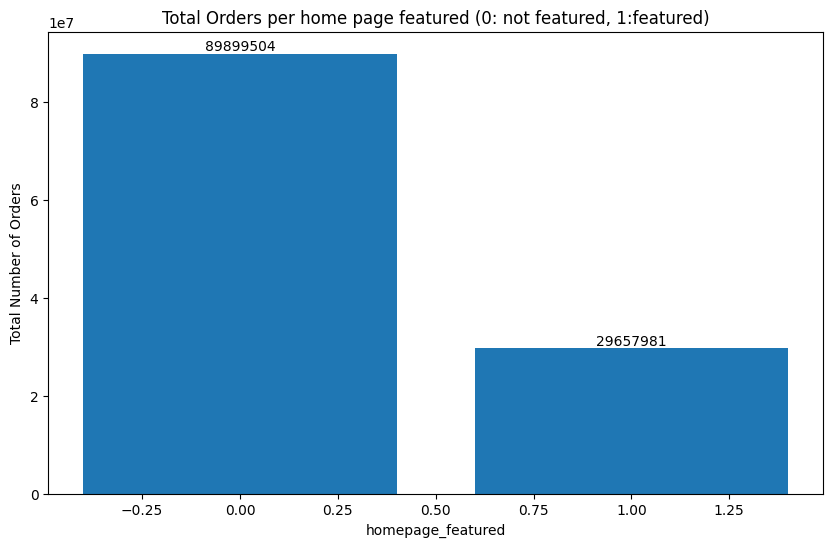

In [195]:
# a bar chart for the 'home page featured' data
plt.figure(figsize=(10, 6))
plt.bar(orders_per_homepage_featured.index, orders_per_homepage_featured.values)
plt.xlabel('homepage_featured')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per home page featured (0: not featured, 1:featured)')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_homepage_featured.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [196]:
merged_data.category.value_counts() #  categories count in 145 weeks

,count
category,
Beverages,127890
Rice Bowl,33408
Sandwich,33291
Pizza,33138
Starters,29941
Other Snacks,29379
Desert,29294
Salad,28559
Pasta,27694


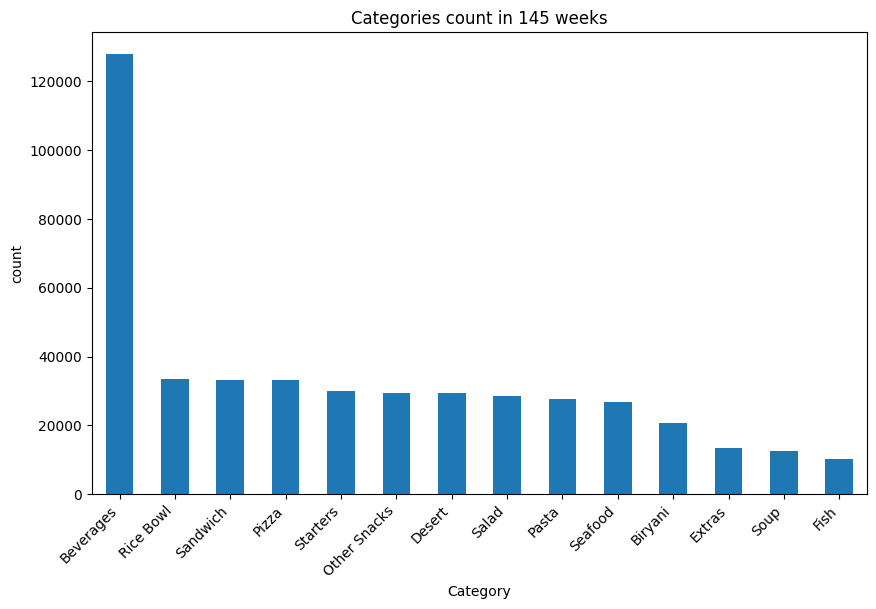

In [197]:
#  categories count
plt.figure(figsize=(10, 6))  #  figure size
merged_data['category'].value_counts().plot(kind='bar')
plt.title('Categories count in 145 weeks')
plt.xlabel('Category')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


 **describing chart**




1.   *we got highest count from beverages*
2.   *we got less count from fish, followed by soup, extras*



In [198]:
# Calculating the number of orders from home page featured  in 145 weeks
orders_per_category = merged_data.groupby('category')['num_orders'].sum()

orders_per_category

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


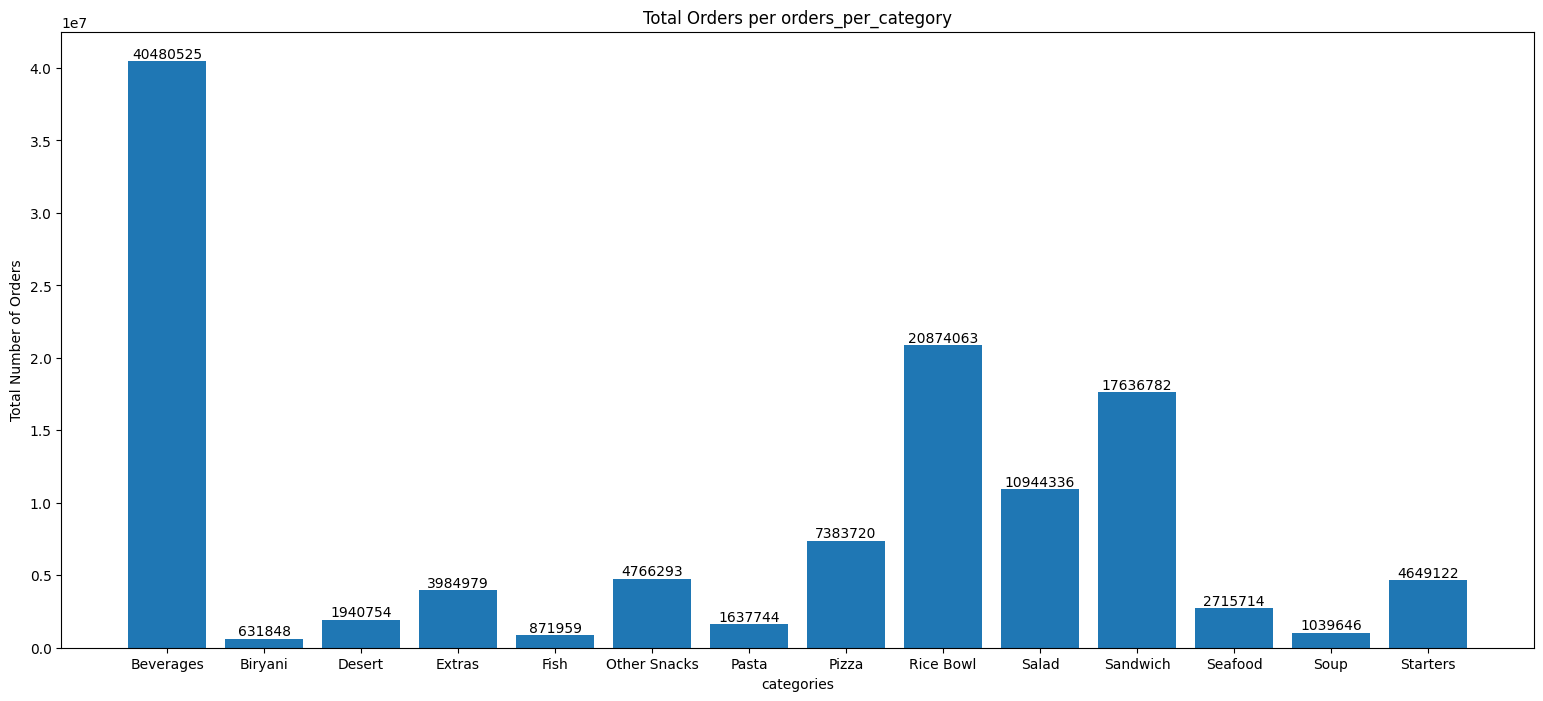

In [199]:
# a bar chart for the 'number of orders per categories'
plt.figure(figsize=(19, 8))
plt.bar(orders_per_category.index, orders_per_category.values)
plt.xlabel('categories')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per orders_per_category')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_category.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [200]:
# Calculate the number of orders from each center type in 145 weeks
orders_per_center_type = merged_data.groupby('center_type')['num_orders'].sum()

orders_per_center_type

,num_orders
center_type,
TYPE_A,68978517
TYPE_B,29996073
TYPE_C,20582895


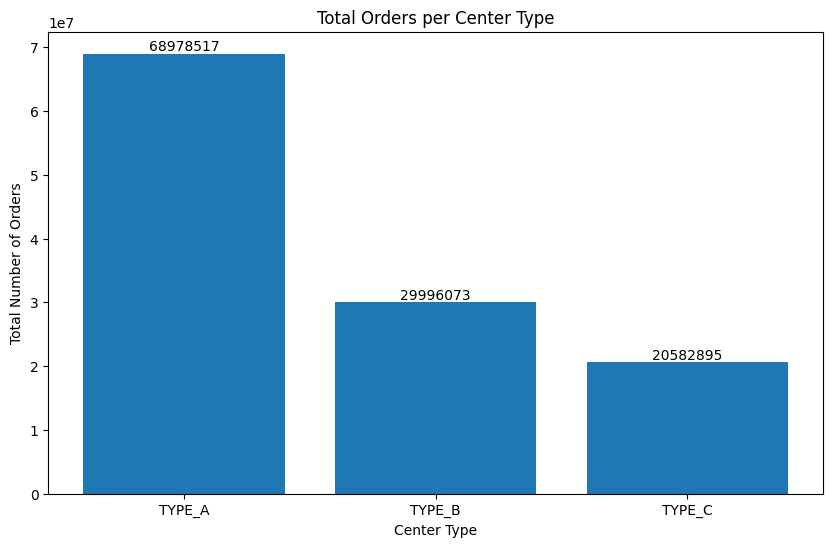

In [201]:
# Calculate the number of orders from each center type
orders_per_center_type = merged_data.groupby('center_type')['num_orders'].sum()

#a bar chart for the 'orders_per_center_type' data
plt.figure(figsize=(10, 6))
plt.bar(orders_per_center_type.index, orders_per_center_type.values)
plt.xlabel('Center Type')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per Center Type')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_center_type.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [202]:
# Calculate the number of orders from each cusine type in 145 weeks
orders_per_cusine_type = merged_data.groupby('cuisine')['num_orders'].sum()

orders_per_cusine_type

,num_orders
cuisine,
Continental,16914439
Indian,25792544
Italian,44172832
Thai,32677670


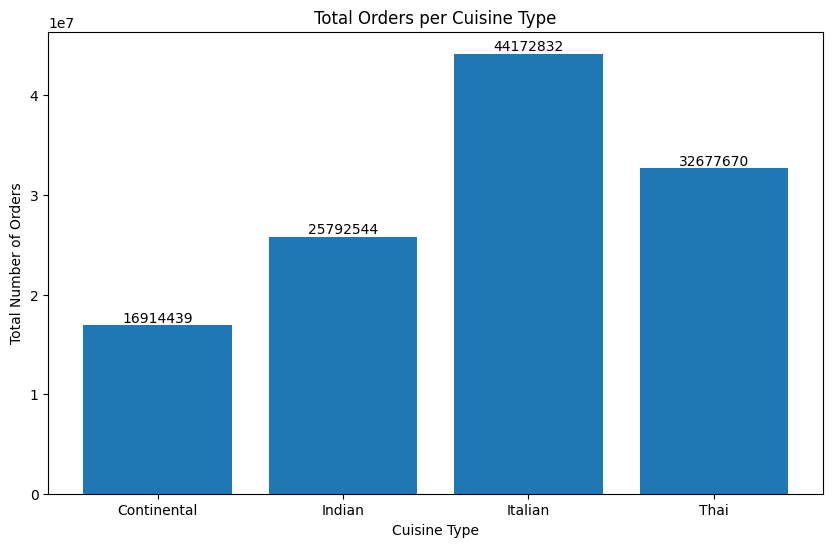

In [203]:
# a bar chart for the 'orders_per_cusine_type' data
plt.figure(figsize=(10, 6))
plt.bar(orders_per_cusine_type.index, orders_per_cusine_type.values)
plt.xlabel('Cuisine Type')
plt.ylabel('Total Number of Orders')
plt.title('Total Orders per Cuisine Type')

# Add the count on the top of each bar
for i, v in enumerate(orders_per_cusine_type.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [204]:

# Calculate average, min, and max checkout_price per category
category_checkout_stats = merged_data.groupby('category')['checkout_price'].agg(['mean', 'min', 'max'])
print("Checkout Price Statistics by Category:\n", category_checkout_stats)

# Calculate average, min, and max checkout_price per cuisine
cuisine_checkout_stats = merged_data.groupby('cuisine')['checkout_price'].agg(['mean', 'min', 'max'])
print("\nCheckout Price Statistics by Cuisine:\n", cuisine_checkout_stats)

# Calculate average, min, and max checkout_price per center_type
center_checkout_stats = merged_data.groupby('center_type')['checkout_price'].agg(['mean', 'min', 'max'])
print("\nCheckout Price Statistics by Center Type:\n", center_checkout_stats)

Checkout Price Statistics by Category:
                     mean     min     max
category                                
Beverages     213.264024    2.97  532.53
Biryani       450.405156   99.00  505.43
Desert        437.600166   98.00  738.23
Extras        173.193299   55.35  340.53
Fish          578.992080  291.03  642.14
Other Snacks  258.132368   97.00  321.13
Pasta         395.663210   78.57  670.27
Pizza         584.004146  389.00  728.53
Rice Bowl     317.532240   56.26  504.43
Salad         290.955440   83.48  485.03
Sandwich      289.988999   82.45  409.40
Seafood       610.598550  145.53  866.27
Soup          222.949614  156.17  272.63
Starters      278.271997  162.05  321.13

Checkout Price Statistics by Cuisine:
                    mean    min     max
cuisine                               
Continental  515.978809   2.97  866.27
Indian       340.769833  45.62  738.23
Italian      285.133102  78.57  670.27
Thai         213.323235  55.35  340.53

Checkout Price Statistics by 

# **FEATURE ENGINEERING TECHNIQUES**

In [205]:
merged_data.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,TYPE_C
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,TYPE_C
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,TYPE_C
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,TYPE_C
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,TYPE_C


In [206]:
# creating a new discount variable - if checkout price is less than base price, which means giving some discount.

# Create a new column 'discount_applied'
merged_data['discount_applied'] = np.where(merged_data['checkout_price'] < merged_data['base_price'], 1, 0)

# Display the first few rows of the updated dataset to see the new column
merged_data.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,discount_applied
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,TYPE_C,1
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,TYPE_C,0
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,TYPE_C,1
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,TYPE_C,1
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,TYPE_C,0


In [207]:
# Count the occurrences of 0 and 1 in the 'discount_applied' column
discount_counts = merged_data['discount_applied'].value_counts()

discount_counts

,count
discount_applied,
1,229687
0,226861


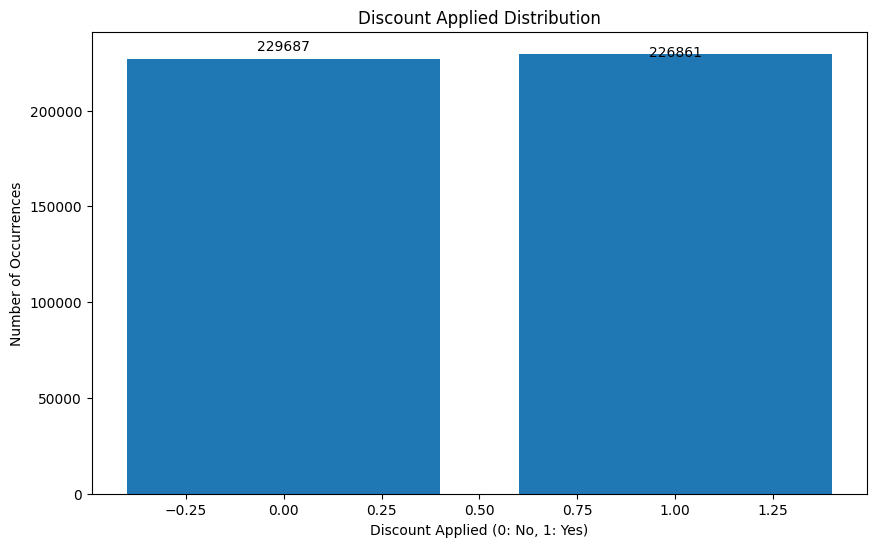

In [208]:
#bar chart for the 'discount_counts' data
plt.figure(figsize=(10, 6))
plt.bar(discount_counts.index, discount_counts.values)
plt.xlabel('Discount Applied (0: No, 1: Yes)')
plt.ylabel('Number of Occurrences')
plt.title('Discount Applied Distribution')

# Add the count on the top of each bar
for i, v in enumerate(discount_counts.values):
  plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

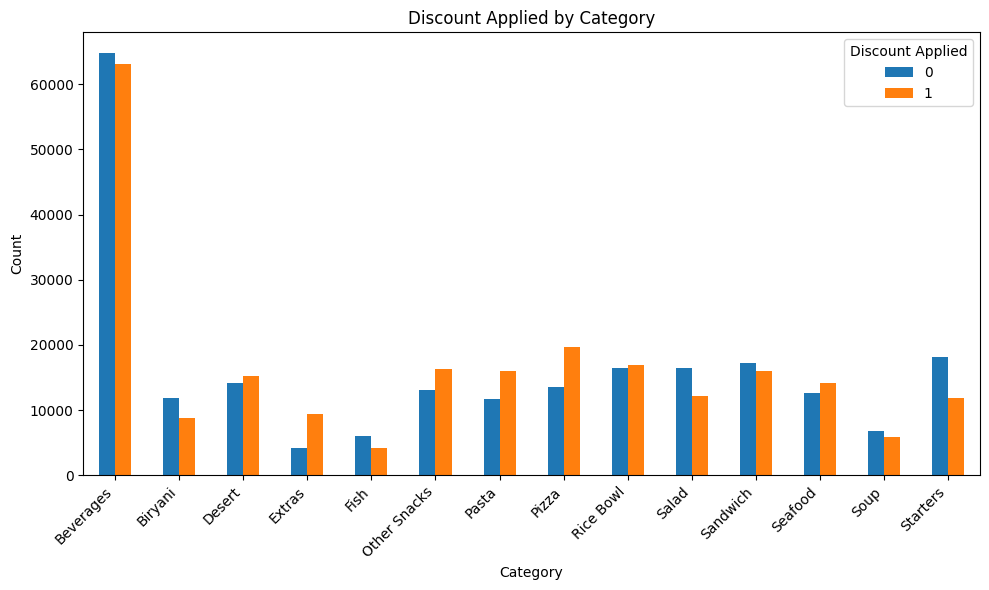

In [209]:
# discount applied to which categories ?
discount_by_category = merged_data.groupby(['category', 'discount_applied']).size().unstack(fill_value=0)

# Create the bar chart
discount_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Discount Applied by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Applied')
plt.tight_layout()
plt.show()



BEVERAGES IS TOP ONE FOR DISCOUNTS AND FISH IS LOW ONE FOR DISCOUNTS

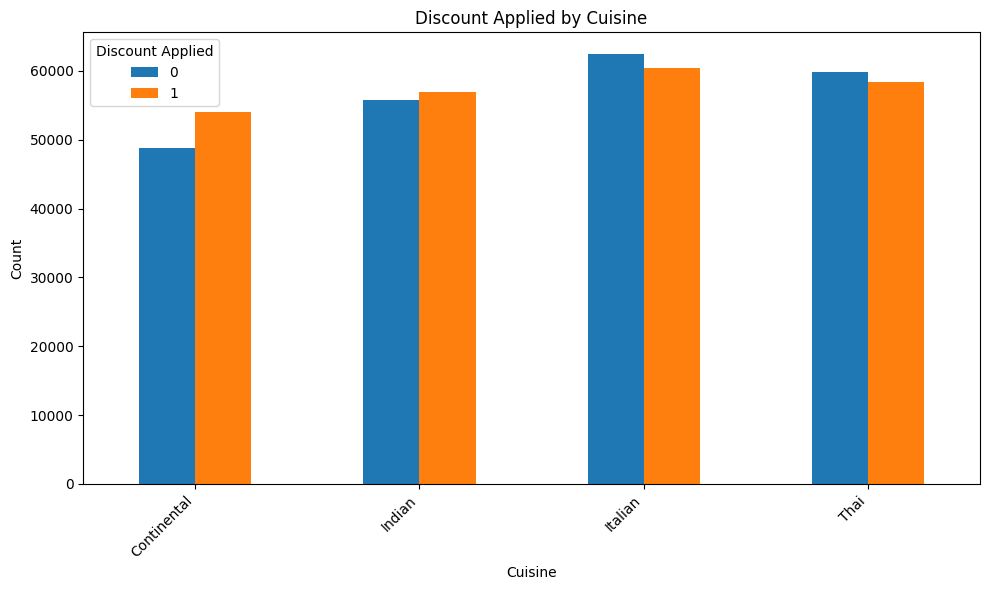

In [210]:
# discount applied to what cuisines ?
discount_by_cuisine = merged_data.groupby(['cuisine', 'discount_applied']).size().unstack(fill_value=0)

# Create the bar chart
discount_by_cuisine.plot(kind='bar', figsize=(10, 6))
plt.title('Discount Applied by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Applied')
plt.tight_layout()
plt.show()

ITALIAN IS TOP FOR DISCOUNTS AND CONTINENTAL IS LOW FOR DISCOUNTS

In [211]:
merged_data.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,discount_applied
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,TYPE_C,1
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,TYPE_C,0
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,TYPE_C,1
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,TYPE_C,1
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,TYPE_C,0


In [212]:
# Calculate the 'revenue' column
merged_data['revenue'] = merged_data['checkout_price'] * merged_data['num_orders']

# Display the first few rows to verify the new column
merged_data.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type,discount_applied,revenue
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,TYPE_C,1,24218.91
1,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,TYPE_C,0,36944.10
2,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,TYPE_C,1,25488.54
3,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,TYPE_C,1,18333.00
4,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,TYPE_C,0,9740.00


In [225]:
# number of meal ids-count
num_meals = len(meal_info['meal_id'].unique())
print(f"There are {num_meals} unique meals.")

There are 51 unique meals.


In [226]:
# Calculate the number of unique centers
num_centers = len(fulfilment_center_info['center_id'].unique())
print(f"There are {num_centers} unique centers.")

There are 77 unique centers.


In [233]:
print(len(average_price_by_meal))

50
